In [1]:
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from sklearn.cluster import KMeans
import importlib
importlib.import_module('mpl_toolkits').__path__
#from mpl_toolkits.mplot4f import Axes3D
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import collections 


In [2]:
# load data
data = pd.read_csv('data/seeds_dataset.txt', sep='\s+', header=None,)
data = np.array(data)
#data=data.astype('float')

In [3]:
# split data (lat column is 'target')
X = data [:,:-1]
y = data[:,-1]



In [4]:
#change 1,2,3 in target class to 0,1,2
indices_of_1 = np.where(y == 1)
indices_of_2 = np.where(y == 2)
indices_of_3 = np.where(y == 3)
y[indices_of_1] = 0
y[indices_of_2] = 1
y[indices_of_3] = 2
y = y.astype('int')

In [5]:
# cluster init 
cluster_algo = KMeans(n_clusters=3)
# cluster fit 
cluster_algo.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:

print (collections.Counter(cluster_algo.labels_)) # print the frequeny of labels
print (collections.Counter(y))

Counter({0: 77, 2: 72, 1: 61})
Counter({0: 70, 1: 70, 2: 70})


In [7]:
cluster_algo.score(X, y)

-587.3186115940455

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

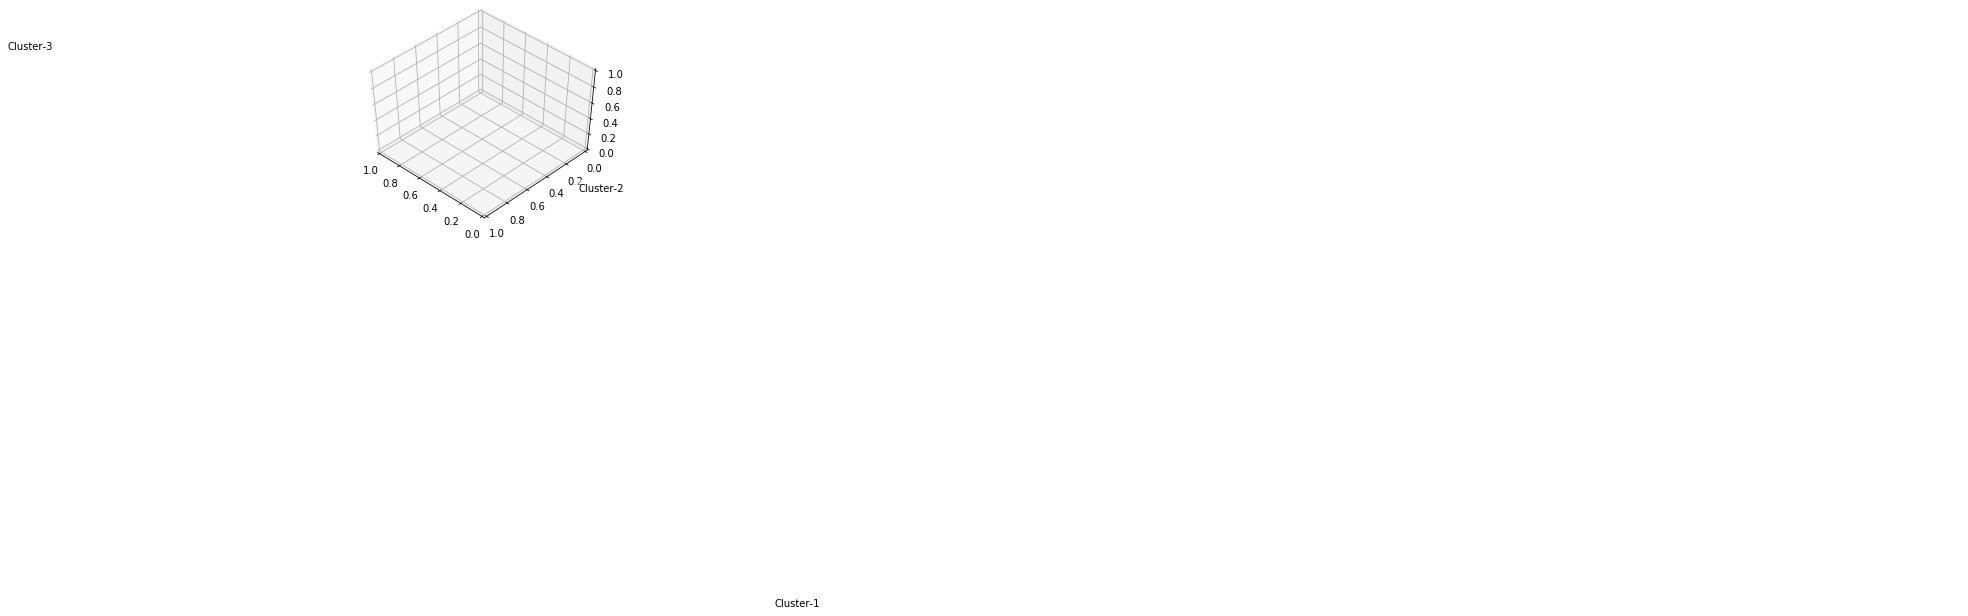

In [9]:
#PCA demonstrated and plotting example 

fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
### PCA part of the code
#============================================================
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
#============================================================

##Plot to demonstrate PCA transformation (using a box plot to demonstrate the transoformation) - not needed for 
for name, label in [('Cluster-1', 0), ('Cluster-2', 1), ('Cluster-3', 2)]: 
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y) # plotting the three clusters and the indicating the sequence parameter 'c'
#ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()